In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
try:
    df_household_convert = pd.read_csv(
        "data/household_power_consumption.txt",
        sep=";",
        dtype=str
    )

    df_household_convert.to_parquet('data/household_power_consumption.parquet', engine='fastparquet', index=False)
except FileNotFoundError:
    print("Arquivo de ref não existe")
except Exception as e:
    print(e)

### 1. Carregue o dataset e exiba as 10 primeiras linhas.

In [4]:
df_household = pd.read_parquet(
    "data/household_power_consumption.parquet",
    engine='fastparquet',
)

df_household.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.000
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.000
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.000
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.000
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.000


---

### 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- Global_active_power:
  A energia real que está sendo consumida pela residência para realizar trabalho útil.

- Global_reactive_power:
  A energia que circula no sistema elétrico, mas não é convertida em trabalho útil.


---

### 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [5]:
for col in [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]:
    df_household[col] = pd.to_numeric(df_household[col], errors='coerce')

In [6]:
df_household.info()
df_household.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df_null_data = pd.DataFrame(
    {
        "nao_nulos": df_household.notna().sum(),
        "nulos": df_household.isna().sum(),
        "percentual (%)": df_household.isna().mean() * 100,
    }
)
df_null_data

,nao_nulos,nulos,percentual (%)
Date,2075259,0,0.000000
Time,2075259,0,0.000000
Global_active_power,2049280,25979,1.251844
Global_reactive_power,2049280,25979,1.251844
Voltage,2049280,25979,1.251844
Global_intensity,2049280,25979,1.251844
Sub_metering_1,2049280,25979,1.251844
Sub_metering_2,2049280,25979,1.251844
Sub_metering_3,2049280,25979,1.251844


---

### 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente


In [8]:
def dia_da_semana(dia: pd.Timestamp):
    dia_semana = datetime.date.weekday(dia)
    if dia == 0:
        return "Monday"
    elif dia == 1:
        return "Tuesday"
    elif dia == 2:
        return "Wednesday"
    elif dia == 3:
        return "Thursday"
    elif dia == 4:
        return "Friday"
    elif dia == 5:
        return "Saturday"
    else:
        return "Sunday"

In [9]:
df_household['Date'] = pd.to_datetime(df_household['Date'], dayfirst=True)
df_household['week_day'] = df_household['Date'].apply(lambda x: dia_da_semana(x))

In [10]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sunday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sunday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sunday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sunday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sunday


---

### 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.


In [11]:
df_household['year'] = df_household['Date'].apply(lambda x: x.year)

In [12]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sunday,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sunday,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sunday,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sunday,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sunday,2006


In [13]:
df_household_group_by_year = (
    df_household.groupby(["year"])
    .agg({"Global_active_power": "mean"})
    .reset_index()
)
df_household_group_by_year[df_household_group_by_year['year'] == 2007]
# df_household_group_by_year.info()

,year,Global_active_power
1,2007,1.117008


---

### 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.


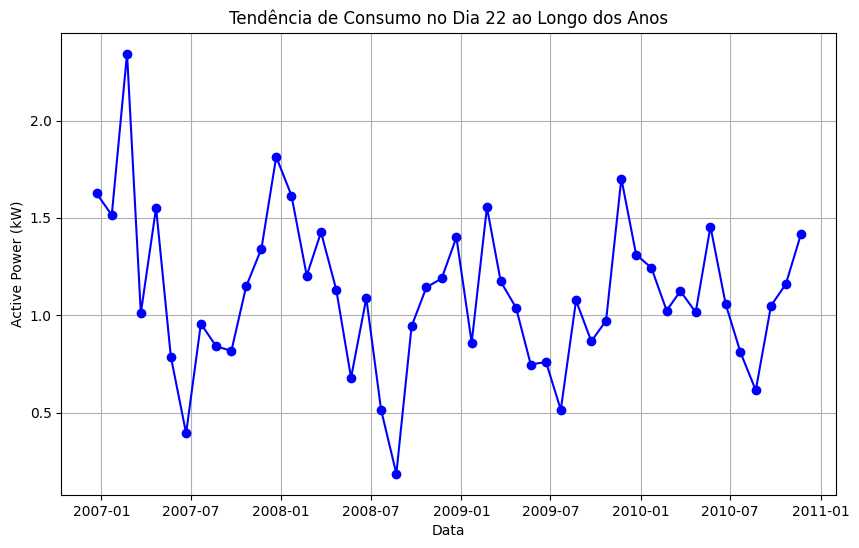

In [14]:
df_household_group_by_date = (
    df_household.groupby(["year", "Date"])
    .agg({"Global_active_power": "mean", "Voltage": "mean"})
    .reset_index()
)

df_household_group_by_date["day"] = df_household_group_by_date["Date"].apply(
    lambda x: x.day
)

# day_consumption = df_household_group_by_date[["year", "day", "Global_active_power"]]
day_consumption = df_household_group_by_date.copy()
day_consumption = day_consumption[day_consumption["day"] == 22]

# Plotar a tendência de consumo ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(
    day_consumption["Date"],
    day_consumption["Global_active_power"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("Data")
plt.ylabel("Active Power (kW)")
plt.title("Tendência de Consumo no Dia 22 ao Longo dos Anos")
plt.grid(True)
plt.show()


---

### 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

In [18]:
mean_consuption = df_household_group_by_date[["Date", "Voltage"]]

fig = px.bar(
    mean_consuption,
    x="Date",
    y="Voltage",
    title="Voltagem / ano",
    text="Voltage",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> Voltagem é algo estável ao longo do tempo

--- 

### 8. Calcule o consumo médio por mês em todo o período disponível no dataset.


In [26]:
month__consuption = df_household_group_by_date.copy()
month__consuption['month'] = month__consuption['Date'].apply(lambda x: x.month)
month__consuption_grouped = month__consuption.groupby("month")['Global_active_power'].mean().round(5).reset_index()

fig = px.bar(
    month__consuption_grouped,
    x="month",
    y="Global_active_power",
    title="Comsumo / mês",
    text="Global_active_power",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()